In [1]:
import torch
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F

In [22]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import helper

In [2]:
# Define a transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [3]:
# Download and load the training data
trainset = datasets.FashionMNIST('/home/jupyter/pytorch-codes/datasets/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('/home/jupyter/pytorch-codes/datasets/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [4]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [5]:
model = Classifier()

In [6]:
images, labels = next(iter(testloader))

In [7]:
# Get the class probabilities
probs = torch.exp(model(images))
probs.shape

torch.Size([64, 10])

In [8]:
top_p, top_class = probs.topk(1, dim=1)

In [9]:
top_class[:10,:]

tensor([[7],
        [7],
        [7],
        [7],
        [7],
        [7],
        [7],
        [7],
        [7],
        [7]])

In [10]:
top_class.shape, labels.shape

(torch.Size([64, 1]), torch.Size([64]))

In [11]:
equals = top_class == labels.view(*top_class.shape)

In [12]:
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f'Accuracy: {accuracy.item() * 100}%')

Accuracy: 7.8125%


In [13]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [21]:
epochs = 10
train_losses, test_losses = [], []

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_probs = model(images)
        loss = criterion(log_probs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        with torch.no_grad():
            for images, labels in testloader:
                log_probs = model(images)
                test_loss += criterion(log_probs, labels)
                
                probs = torch.exp(log_probs)

                top_p, top_class = probs.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
                
        print("Epoch: {}/{} ".format(e+1, epochs),
              "Training Loss: {:.3f} ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f} ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/10  Training Loss: 0.227  Test Loss: 0.392  Test Accuracy: 0.879
Epoch: 2/10  Training Loss: 0.226  Test Loss: 0.356  Test Accuracy: 0.886
Epoch: 3/10  Training Loss: 0.219  Test Loss: 0.374  Test Accuracy: 0.883
Epoch: 4/10  Training Loss: 0.212  Test Loss: 0.384  Test Accuracy: 0.887
Epoch: 5/10  Training Loss: 0.211  Test Loss: 0.430  Test Accuracy: 0.875
Epoch: 6/10  Training Loss: 0.209  Test Loss: 0.392  Test Accuracy: 0.880
Epoch: 7/10  Training Loss: 0.209  Test Loss: 0.395  Test Accuracy: 0.883
Epoch: 8/10  Training Loss: 0.199  Test Loss: 0.381  Test Accuracy: 0.887
Epoch: 9/10  Training Loss: 0.196  Test Loss: 0.427  Test Accuracy: 0.883
Epoch: 10/10  Training Loss: 0.195  Test Loss: 0.400  Test Accuracy: 0.887


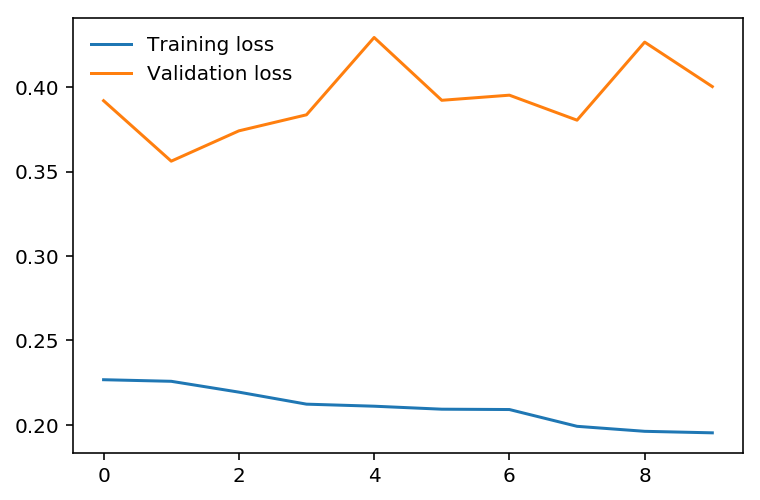

In [24]:
plt.plot(train_losses, label='Training loss');
plt.plot(test_losses, label='Validation loss');
plt.legend(frameon=False);

> **Exercise:** Add dropout to your model and train it on Fashion-MNIST again. See if you can get a lower validation loss or higher accuracy.

In [25]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
         # With dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [26]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [ ]:
epochs = 10
train_losses, test_losses = [], []

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_probs = model(images)
        loss = criterion(log_probs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        with torch.no_grad():
            model.eval()
            
            for images, labels in testloader:
                log_probs = model(images)
                test_loss += criterion(log_probs, labels)
                
                probs = torch.exp(log_probs)

                top_p, top_class = probs.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
                
        print("Epoch: {}/{} ".format(e+1, epochs),
              "Training Loss: {:.3f} ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f} ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
        
    model.train()

Epoch: 1/10  Training Loss: 0.603  Test Loss: 0.477  Test Accuracy: 0.823
Epoch: 2/10  Training Loss: 0.480  Test Loss: 0.448  Test Accuracy: 0.836
Epoch: 3/10  Training Loss: 0.450  Test Loss: 0.422  Test Accuracy: 0.849
Epoch: 4/10  Training Loss: 0.430  Test Loss: 0.421  Test Accuracy: 0.853
Epoch: 5/10  Training Loss: 0.419  Test Loss: 0.400  Test Accuracy: 0.859


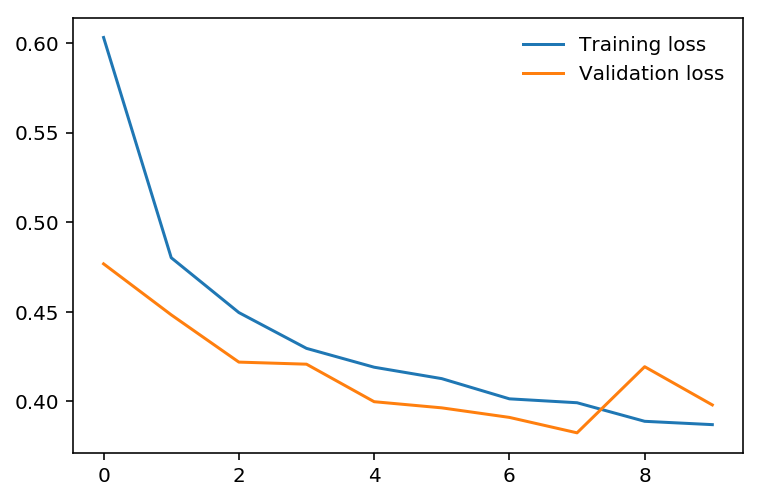

In [28]:
plt.plot(train_losses, label='Training loss');
plt.plot(test_losses, label='Validation loss');
plt.legend(frameon=False);

## Inference

In [29]:
model.eval()

Classifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2)
)

In [30]:
dataiter = iter(testloader)
images, labels = dataiter.next()

In [31]:
img = images[0]
img = img.view(1, 784)

In [32]:
with torch.no_grad():
    output = model.forward(img)

In [33]:
probs = torch.exp(output)

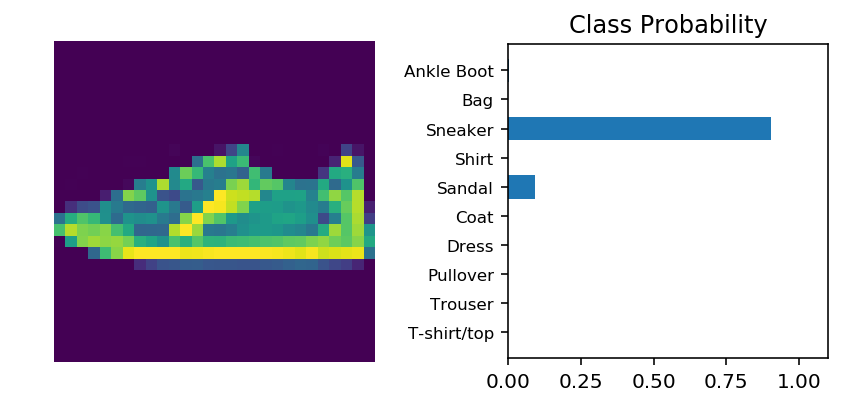

In [34]:
helper.view_classify(img.view(1, 28, 28), probs, version='Fashion')